A manufacturing company has been experiancing a shift in the market place towards digital possibly leading a decline in its store sale (Resellers).

1. Shift in the market place towards digital - Is this true? Can we prove it with the data?

    A. We upload the data (Marketplacedata.csv)- the file contains both the online and store sales data.
    
    B. We will compare sales (revenue, profit, volume of transactions and items sold(order quantities) over time) 

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# read the data
data = pd.read_csv('Marketplacedata.csv')
data.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,Cost,UnitPrice,Revenue,Profit,OnlineOrderFlag,OrderDate
0,43659,1,1,1898.0944,2024.994,2024.994,126.8996,Reseller,2011-05-31 00:00:00.000
1,43659,2,3,5694.2832,2024.994,6074.982,380.6988,Reseller,2011-05-31 00:00:00.000
2,43659,3,1,1898.0944,2024.994,2024.994,126.8996,Reseller,2011-05-31 00:00:00.000
3,43659,4,1,1912.1544,2039.994,2039.994,127.8396,Reseller,2011-05-31 00:00:00.000
4,43659,5,1,1912.1544,2039.994,2039.994,127.8396,Reseller,2011-05-31 00:00:00.000


In [3]:
# check the shape of the data
data.shape

(121317, 9)

In [4]:
#
data.describe()

,SalesOrderID,SalesOrderDetailID,OrderQty,Cost,UnitPrice,Revenue,Profit
count,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000
mean,57827.363782,60659.000000,2.266080,828.197843,465.093496,905.449207,77.251363
std,9009.147902,35021.345641,2.491323,1705.596529,751.885081,1693.417389,404.866112
min,43659.000000,1.000000,1.000000,0.856500,1.328200,1.374000,-15099.745500
25%,49884.000000,30330.000000,1.000000,10.842300,21.490000,24.990000,1.204600
50%,57029.000000,60659.000000,1.000000,104.705200,49.990000,134.982000,13.452700
75%,65490.000000,90988.000000,3.000000,1030.948800,602.346000,1120.490000,43.813700
max,75123.000000,121317.000000,44.000000,38530.385400,3578.270000,27893.619000,1487.835600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SalesOrderID        121317 non-null  int64  
 1   SalesOrderDetailID  121317 non-null  int64  
 2   OrderQty            121317 non-null  int64  
 3   Cost                121317 non-null  float64
 4   UnitPrice           121317 non-null  float64
 5   Revenue             121317 non-null  float64
 6   Profit              121317 non-null  float64
 7   OnlineOrderFlag     121317 non-null  object 
 8   OrderDate           121317 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 8.3+ MB


In [6]:
# Let's rename the columns for better understanding
data = data.rename(columns={'OnlineOrderFlag':'Channels'})

In [7]:
data.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,Cost,UnitPrice,Revenue,Profit,Channels,OrderDate
0,43659,1,1,1898.0944,2024.994,2024.994,126.8996,Reseller,2011-05-31 00:00:00.000
1,43659,2,3,5694.2832,2024.994,6074.982,380.6988,Reseller,2011-05-31 00:00:00.000
2,43659,3,1,1898.0944,2024.994,2024.994,126.8996,Reseller,2011-05-31 00:00:00.000
3,43659,4,1,1912.1544,2039.994,2039.994,127.8396,Reseller,2011-05-31 00:00:00.000
4,43659,5,1,1912.1544,2039.994,2039.994,127.8396,Reseller,2011-05-31 00:00:00.000


In [8]:
# Let's extract only the date part from the OrderDate column
data['OrderDate'] = pd.to_datetime(data['OrderDate']).dt.date

In [9]:
data.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,Cost,UnitPrice,Revenue,Profit,Channels,OrderDate
0,43659,1,1,1898.0944,2024.994,2024.994,126.8996,Reseller,2011-05-31
1,43659,2,3,5694.2832,2024.994,6074.982,380.6988,Reseller,2011-05-31
2,43659,3,1,1898.0944,2024.994,2024.994,126.8996,Reseller,2011-05-31
3,43659,4,1,1912.1544,2039.994,2039.994,127.8396,Reseller,2011-05-31
4,43659,5,1,1912.1544,2039.994,2039.994,127.8396,Reseller,2011-05-31


In [24]:
# check for the count of each market segment
data['Channels'].value_counts()

Channels
Reseller    60919
Online      60398
Name: count, dtype: int64

<Axes: xlabel='Channels'>

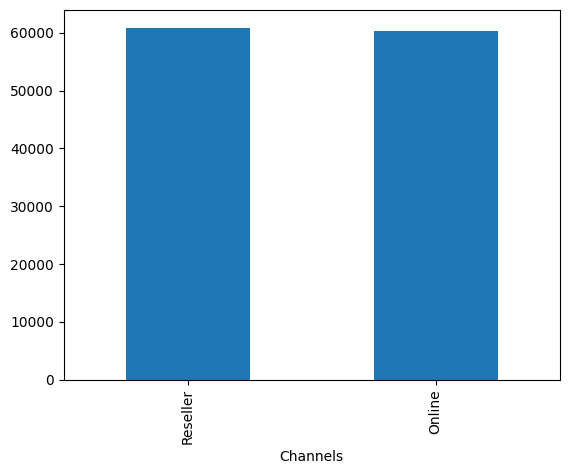

In [ ]:
# plot the count of each market segment
data['Channels'].value_counts().plot(kind='bar')

In [28]:
# Calculate the total transaction volume for each market segment
total_volume =data['OrderQty'].sum()
print('Total Transaction Volume:',total_volume)

Total Transaction Volume: 274914


In [36]:
# Let's compute the total transaction volume for each market segment
data.groupby('Channels')['OrderQty'].sum()

Channels
Online       60398
Reseller    214516
Name: OrderQty, dtype: int64

<Axes: xlabel='Channels'>

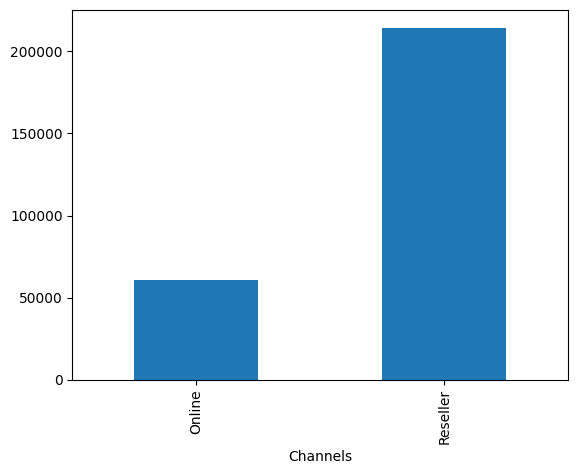

In [35]:
# plot the total transaction volume for each market segment
data.groupby('Channels')['OrderQty'].sum().plot(kind='bar')

In [13]:
# Let's compare the revenue by channels
# Displaying the revenue by channels in million (divide by 1 million)
data['Revenue'].groupby(data['Channels']).sum() / 1000000

Channels
Online      29.358677
Reseller    80.487704
Name: Revenue, dtype: float64

<Axes: xlabel='Channels'>

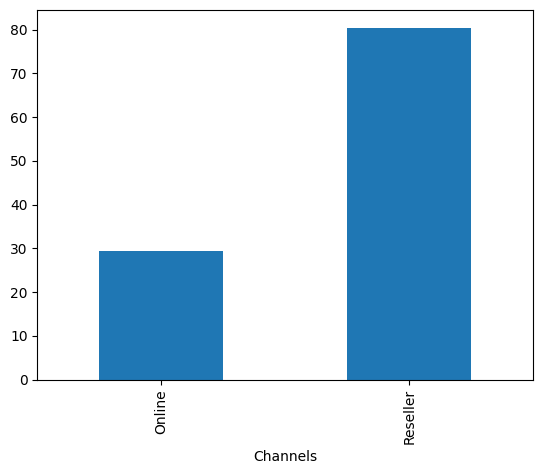

In [ ]:
# Plotting the revenue by channels
data_revenue = data['Revenue'].groupby(data['Channels']).sum() / 1000000
data_revenue.plot(kind='bar')


In [ ]:
# Let's compare the profit by channels
data['Profit'].groupby(data['Channels']).sum()/1000000

Channels
Online      11.687943
Reseller    -2.316039
Name: Profit, dtype: float64

<Axes: xlabel='Channels'>

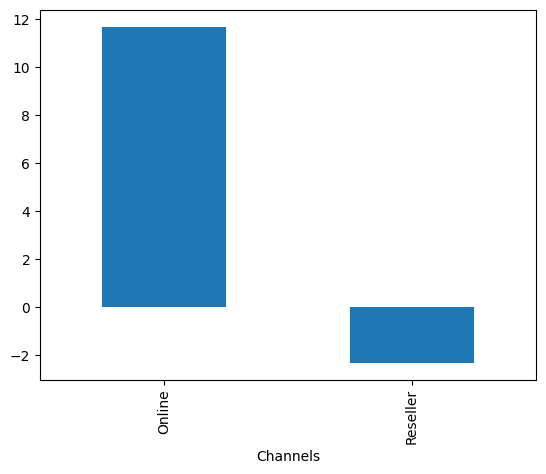

In [19]:
# Let's visualize the profit by channels
data_profit = data['Profit'].groupby(data['Channels']).sum() / 1000000
data_profit.plot(kind='bar')